# Observations

* Observing the data, at the equator (0 lattitude), shows the highest temperature values in a condensed cluster, this is because there is minimal change in distance from the run regardless of which hemisphere is in its summer or winter cycle (think planet tilt); cities closest to the equator generally stay hotter with consistent clear weather climate; while the latitudes in the positive and negative increase will have non consistent temperatures due to there localized climate.
* Being the hottest location at the equator (0 lattitude), the data shows it to have a consistent humidity percentage at the equator; whereas as you move away from the equator its more sporadic which is due to variety of weather patterns and differences between temperatures. 
* Clouds and Wind Speed have no real correlation as these can fluctuate more frequently during one day cycle then compared to temperature; coriolis plays a big role along with pressure differentials which can cause an increase or decrease in winds, while cloud travel will be determined by how fast or slow they'll move across the sky depending on the winds, so it is much harder to predict.

interesting website to observe these trends in real-time: https://earth.nullschool.net/

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [3]:
cities[0]

'atuona'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# url for accessing  api data from openweather
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b3ff37a40edf22f7c0171626f6994478


In [6]:

#create lists for storing api data
cityName = []
lat = []
lng = []
maxTemp = []
humidity = []
clouds = []
windSpeed = []
country = []
dates = []

# set initial count quantities for organization
countRecord = 1
countSet = 1

print(f"Beginning Data Retrieval")
print(f"------------------------------------------")

# loops for creating dataframe columns
for city in cities:
    
    
    try:
       
        response = requests.get(f"{url}&q={city}").json()
        cityName.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])               
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        
        
        print(f"Processing Record {countRecord} of set {countSet} | {city}")  
                
        countRecord += 1
       
         
        if countRecord == 51:
            countSet += 1
            countRecord = 1
   
    except KeyError:
        print(f"{city} not found. Skipping...")
        #print((f"{url}&q={city}"))
    #break
    continue
    
  

print(f"------------------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------------------")

Beginning Data Retrieval
------------------------------------------
Processing Record 1 of set 1 | atuona
Processing Record 2 of set 1 | punta arenas
Processing Record 3 of set 1 | kavaratti
Processing Record 4 of set 1 | kaitangata
Processing Record 5 of set 1 | thompson
Processing Record 6 of set 1 | butaritari
Processing Record 7 of set 1 | albany
Processing Record 8 of set 1 | vaini
Processing Record 9 of set 1 | barrow
Processing Record 10 of set 1 | port alfred
Processing Record 11 of set 1 | ushuaia
Processing Record 12 of set 1 | chuy
Processing Record 13 of set 1 | bluff
Processing Record 14 of set 1 | clarence town
Processing Record 15 of set 1 | camocim
Processing Record 16 of set 1 | goderich
Processing Record 17 of set 1 | nikolskoye
Processing Record 18 of set 1 | sonoita
barentsburg not found. Skipping...
Processing Record 19 of set 1 | souillac
Processing Record 20 of set 1 | kapaa
Processing Record 21 of set 1 | vostok
Processing Record 22 of set 1 | lac du bonnet
Proc

Processing Record 36 of set 4 | havre-saint-pierre
Processing Record 37 of set 4 | luanda
Processing Record 38 of set 4 | vaitape
Processing Record 39 of set 4 | makhachkala
Processing Record 40 of set 4 | nizhniy odes
Processing Record 41 of set 4 | gloucester
Processing Record 42 of set 4 | watsa
Processing Record 43 of set 4 | jackson
Processing Record 44 of set 4 | camana
Processing Record 45 of set 4 | namibe
Processing Record 46 of set 4 | palencia
Processing Record 47 of set 4 | comodoro rivadavia
Processing Record 48 of set 4 | norman wells
Processing Record 49 of set 4 | lagoa
Processing Record 50 of set 4 | sangueya
Processing Record 1 of set 5 | castro
Processing Record 2 of set 5 | mehamn
Processing Record 3 of set 5 | adrar
Processing Record 4 of set 5 | mankono
Processing Record 5 of set 5 | uruguaiana
Processing Record 6 of set 5 | ishinomaki
Processing Record 7 of set 5 | puerto ayora
Processing Record 8 of set 5 | lavrentiya
Processing Record 9 of set 5 | vestmannaeyja

Processing Record 25 of set 8 | maarianhamina
Processing Record 26 of set 8 | jurado
Processing Record 27 of set 8 | beloha
Processing Record 28 of set 8 | trinidad
Processing Record 29 of set 8 | ostrovnoy
Processing Record 30 of set 8 | amahai
Processing Record 31 of set 8 | mubi
sidi bu zayd not found. Skipping...
Processing Record 32 of set 8 | storforshei
Processing Record 33 of set 8 | vestmanna
Processing Record 34 of set 8 | acarau
Processing Record 35 of set 8 | shimoda
Processing Record 36 of set 8 | sistranda
Processing Record 37 of set 8 | acari
Processing Record 38 of set 8 | rawson
Processing Record 39 of set 8 | fukue
Processing Record 40 of set 8 | tambura
Processing Record 41 of set 8 | hit
Processing Record 42 of set 8 | lloydminster
eldikan not found. Skipping...
Processing Record 43 of set 8 | siaya
Processing Record 44 of set 8 | avera
marcona not found. Skipping...
Processing Record 45 of set 8 | constitucion
Processing Record 46 of set 8 | narsaq
hunza not found.

Processing Record 4 of set 12 | tianpeng
Processing Record 5 of set 12 | huarmey
Processing Record 6 of set 12 | eureka
Processing Record 7 of set 12 | hofn
Processing Record 8 of set 12 | hami
Processing Record 9 of set 12 | hernani
Processing Record 10 of set 12 | lluta
Processing Record 11 of set 12 | southampton
Processing Record 12 of set 12 | kidal
Processing Record 13 of set 12 | la ronge
Processing Record 14 of set 12 | bathsheba
Processing Record 15 of set 12 | tiznit
Processing Record 16 of set 12 | ipatovo
Processing Record 17 of set 12 | adeje
Processing Record 18 of set 12 | ottawa
------------------------------------------
Data Retrieval Complete
------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dictionary from the lists
cityDict = {
    "City": cityName,
    "Lat":lat, 
    "Lng":lng,
    "Max Temp": maxTemp,
    "Humidity": humidity,
    "Cloudiness":clouds, 
    "Wind Speed":windSpeed,
    "Country":country,
    "Date":dates      
    }

# Create a dataframe using the dicttionary from above
city_data_df = pd.DataFrame(cityDict)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,81.46,73,13,14.43,PF,1588814312
1,Punta Arenas,-53.15,-70.92,41.00,93,75,2.24,CL,1588814426
2,Kavaratti,10.57,72.64,85.59,71,95,4.65,IN,1588814345
3,Kaitangata,-46.28,169.85,59.59,62,42,13.82,NZ,1588814427
4,Thompson,55.74,-97.86,33.80,37,5,11.41,CA,1588814427


In [8]:
#city_data_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,81.46,73,13,14.43,PF,1588814312
1,Punta Arenas,-53.15,-70.92,41.00,93,75,2.24,CL,1588814426
2,Kavaratti,10.57,72.64,85.59,71,95,4.65,IN,1588814345
3,Kaitangata,-46.28,169.85,59.59,62,42,13.82,NZ,1588814427
4,Thompson,55.74,-97.86,33.80,37,5,11.41,CA,1588814427
...,...,...,...,...,...,...,...,...,...
563,Bathsheba,13.22,-59.52,80.60,78,40,20.80,BB,1588814566
564,Tiznit Province,29.58,-9.50,63.45,79,100,2.55,MA,1588814567
565,Ipatovo,45.72,42.90,56.32,92,100,12.50,RU,1588814567
566,Adeje,28.12,-16.73,70.00,72,40,10.29,ES,1588814567


In [10]:
#  Get the indices of cities that have humidity over 100%.
idx100 = city_data_df[city_data_df['Humidity'] > 100].index

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data_df = city_data_df.drop(idx100, inplace=False)

cleaned_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,81.46,73,13,14.43,PF,1588814312
1,Punta Arenas,-53.15,-70.92,41.00,93,75,2.24,CL,1588814426
2,Kavaratti,10.57,72.64,85.59,71,95,4.65,IN,1588814345
3,Kaitangata,-46.28,169.85,59.59,62,42,13.82,NZ,1588814427
4,Thompson,55.74,-97.86,33.80,37,5,11.41,CA,1588814427


In [12]:
# Extract relevant fields from the data frame
relevant_df = cleaned_city_data_df.filter(['City','Country', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'], axis=1)
relevant_df.head() 
# Export the City_Data into a csv
relevant_df.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

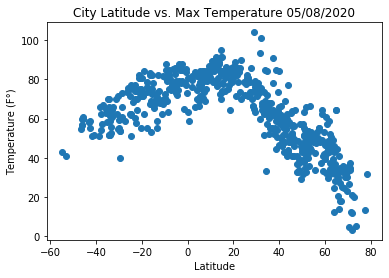

Observing the data, at the equator (0 lattitude),
 shows the highest temperature values in a condensed cluster,
 this being the cities closest to the equator; while the
 latitude increases in both directions the temp values decrease,
 these being the values for the cities increasing in distance from the equator.


In [82]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Max Temp"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F°)")
plt.xlabel("Latitude")


# Save the chart
plt.savefig("images/City Latitude vs. Max Temperature.png")
plt.show()

print("Observing the data, at the equator (0 lattitude),\n shows the highest temperature values in a condensed cluster,\n this being the cities closest to the equator; while the\n latitude increases in both directions the temp values decrease,\n these being the values for the cities increasing in distance from the equator.")

## Latitude vs. Humidity Plot

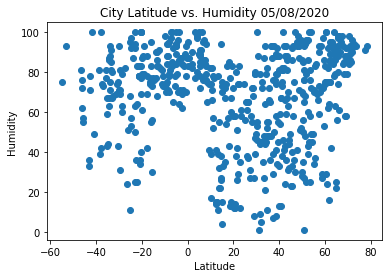

Being the hottest location at the equator (0 lattitude), 
the data shows it to be consistenly humid


In [83]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Humidity"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")


# Save the chart
plt.savefig("images/City Latitude vs. Humidity.png")
plt.show()

print("Being the hottest location at the equator (0 lattitude), \nthe data shows it to be consistenly humid")

## Latitude vs. Cloudiness Plot

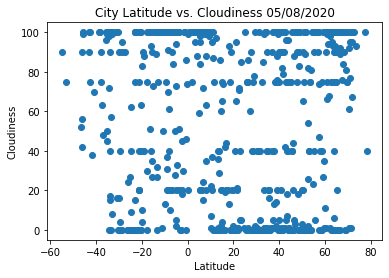

The data for clouds appears to be very irregular, 
 and I'm curious how they sampled the percentages, 
 other than no clouds and full coverage


In [84]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Cloudiness"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")


# Save the chart
plt.savefig("images/City Latitude vs. Cloudinessy.png")
plt.show()

print("The data for clouds appears to be very irregular, \n and I'm curious how they sampled the percentages, \n other than no clouds and full coverage")

## Latitude vs. Wind Speed Plot

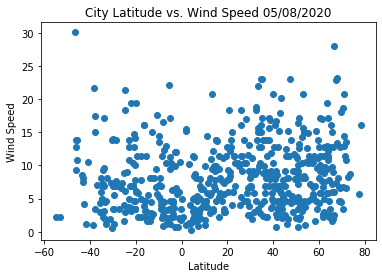

Wind speed at surface appear to have a uniform 
 disperal, with a few outliers of faster currents in the 
 higher +/- latitudes this is caused by the 


In [85]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Wind Speed"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the chart
plt.savefig("images/City Latitude vs. Wind Speed.png")
plt.show()

print("Wind speed at surface appear to have a uniform \n disperal, with a few outliers of faster currents in the \n higher +/- latitudes this is caused by the ")

## Linear Regression

In [86]:
# OPTIONAL: Create a function to create Linear Regression plots
# Function takes 6 argument, x_axis & y_axis handles the data being plotted,
# x_title & y_title are the axis titles applied to appropriate axis data,
# and x_cord & y_cord gives location to start the annotation.

def regressionPlot(x_axis, y_axis, x_title, y_title, x_cord, y_cord):
    
    # calculates the values needed for plotting the linear regression and displaying the r-square value
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    # creates the linear regression
    regress_values = x_axis * slope + intercept
    
    # equation for being displayed on plot
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Scatter plot block of code for plotting data and titling
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.annotate(line_eq,(x_cord,y_cord), fontsize=18, color="red")
    plt.xlabel(x_title, fontsize=16)
    plt.ylabel(y_title, fontsize=16)
    plt.title(f'{x_title} vs. {y_title} {time.strftime("%m/%d/%Y")}', fontsize=16)
    print(f"The R-Squared is: {rvalue**2}")
    return



In [87]:
# Create Northern and Southern Hemisphere DataFrames

# Northern Hemisphere
northHemi_df = relevant_df[relevant_df['Lat'] >= 0]

# Southern Hemisphere
southHemi_df = relevant_df[relevant_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Squared is: 0.7322333542590158

Observing the data, at the equator (0 lattitude),
 shows the highest temperature values in a condensed cluster,
 this being the cities closest to the equator; while the
 latitude increases in the positive direction the temp values decrease,
 these being the values for the cities increasing in distance from the equator.


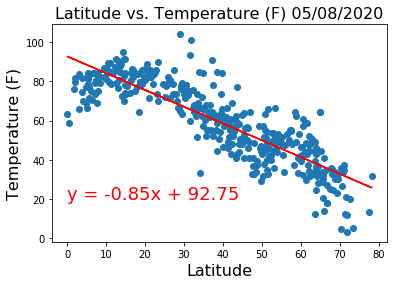

In [75]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Max Temp'],'Latitude','Temperature (F)', 0, 20)
print("\nObserving the data, at the equator (0 lattitude),\n shows the highest temperature values in a condensed cluster,\n this being the cities closest to the equator; while the\n latitude increases in the positive direction the temp values decrease,\n these being the values for the cities increasing in distance from the equator.")
plt.savefig("images/northTempLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Squared is: 0.5525102506751635

Observing the data, at the equator (0 lattitude),
 shows the highest temperature values in a condensed cluster,
 this being the cities closest to the equator; while the
 latitude increases in the negative direction the temp values decrease,
 these being the values for the cities increasing in distance from the equator.


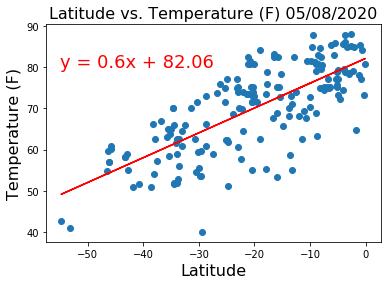

In [74]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Max Temp'],'Latitude','Temperature (F)',-55, 80)
print("\nObserving the data, at the equator (0 lattitude),\n shows the highest temperature values in a condensed cluster,\n this being the cities closest to the equator; while the\n latitude increases in the negative direction the temp values decrease,\n these being the values for the cities increasing in distance from the equator.")
plt.savefig("images/southTempLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Squared is: 0.042140321994978476

Being the hottest location at the equator (0 lattitude), 
the data shows it to be consistenly humid at the equator.


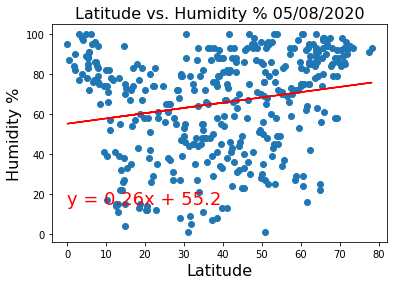

In [76]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Humidity'],'Latitude','Humidity %', 0, 15)
print("\nBeing the hottest location at the equator (0 lattitude), \nthe data shows it to be consistenly humid at the equator.")
plt.savefig("images/northHumLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Squared is: 0.08430531262446812

Being the hottest location at the equator (0 lattitude), 
the data shows it to be consistenly humid at the equator.


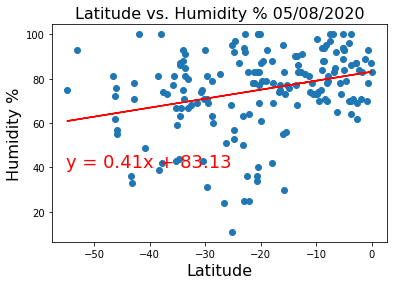

In [77]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Humidity'],'Latitude','Humidity %',-55, 40)
print("\nBeing the hottest location at the equator (0 lattitude), \nthe data shows it to be consistenly humid at the equator.")
plt.savefig("images/southHumLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared is: 0.00908214655637857

No Measurable Correlation.


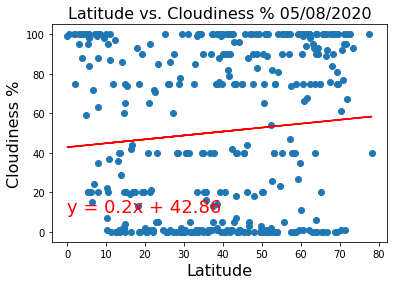

In [78]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Cloudiness'],'Latitude','Cloudiness %', 0, 10)
print("\nNo Measurable Correlation.")
plt.savefig("images/northCloudLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared is: 0.006045945130259036

No Measurable Correlation.


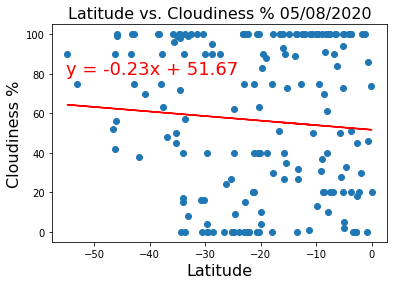

In [79]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Cloudiness'],'Latitude','Cloudiness %',-55, 80)
print("\nNo Measurable Correlation.")
plt.savefig("images/southCloudLat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Squared is: 0.032061564643310766

No Measurable Correlation.


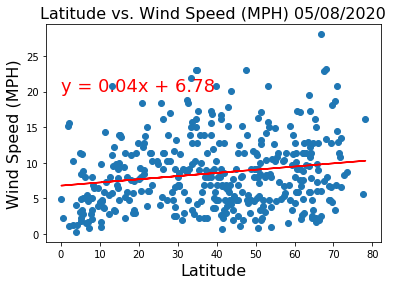

In [80]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Wind Speed'],'Latitude','Wind Speed (MPH)', 0, 20)
print("\nNo Measurable Correlation.")
plt.savefig("images/northWindLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Squared is: 0.01944972088829716

No Measurable Correlation.


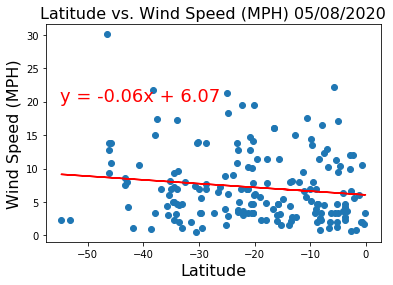

In [81]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Wind Speed'],'Latitude','Wind Speed (MPH)',-55, 20)
print("\nNo Measurable Correlation.")
plt.savefig("images/southWindLat.png")